<b>An Interactive Data Visualization</b>

I wrote the code below to complete one of the data visualization projects for University of Michigan's *Applied Data Science with Python* series, avaiable through Coursera. I chose to complete an interactive visualization, the hardest challenge available, in order to gain more practice working with Matplotlib.

The idea behind the interactive visualization is provided in this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf). The basic idea is that users can decide on the interval within which they want the mean value to fall, and the different bars will change colors to show the probability that the mean of that dataset falls within the interval.

<b>After downloading the file, just run the code below, and then use the bars at the bottom of the visualization to set the interval.</b>

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
%matplotlib notebook

In [3]:
means = df.mean(axis=1)
sems = df.sem(axis=1)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as stats

In [5]:
ci = .995
z_score = stats.norm.ppf(ci)

yerr = sems * z_score
yerr

1992    8553.984758
1993    4195.256227
1994    5984.732121
1995    2975.150848
dtype: float64

In [6]:
z_score

2.5758293035489004

In [7]:
from matplotlib.artist import Artist
import matplotlib.cm as cm
from matplotlib.widgets import Slider

<b>Drag the sliding bars at the bottom of the image below to determine the interval under consideration.</b>

<IPython.core.display.Javascript object>


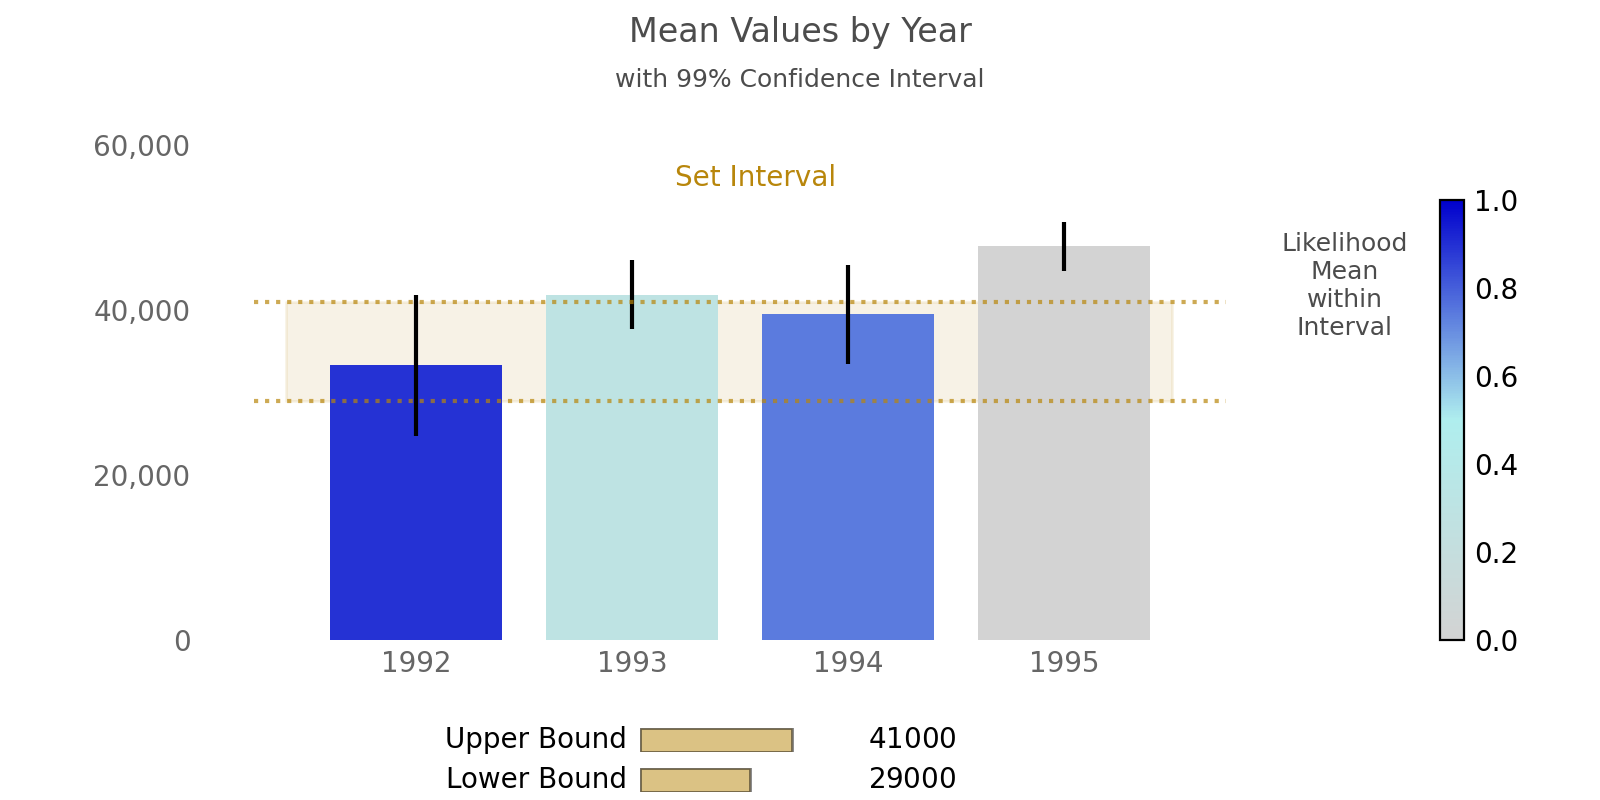

In [8]:
x_between = np.arange(1991.4, 1995.6, .1)
upper = 40000
lower = 30000

mean_n = means.values.reshape(-1, 1)
sem_n = sems.values.reshape(-1, 1)


ranges = np.array([[lower, upper], [lower, upper], [lower, upper], [lower, upper]])
z_s = (ranges - mean_n)/sem_n
probs = stats.norm.cdf(z_s[:,1]) - stats.norm.cdf(z_s[:,0])

fig, ax = plt.subplots(1,1, figsize=(8, 4))
cmap = colors.LinearSegmentedColormap.from_list("Certainty", ["lightgray", "paleturquoise",
                                                              "mediumblue"])
bar = ax.bar(means.index, means, yerr=yerr, color=cmap(probs))
ax.set_xticks(means.index)
ax.set_xticklabels(["1992", "1993", "1994", "1995"], alpha=.6)
ax.tick_params(axis="both", length=0)
ax.set_ylim([0, 65000])
ax.set_xlim([1991, 1996])
ax.set_yticks([0, 20000, 40000, 60000])
ax.set_yticklabels(["0", "20,000", "40,000", "60,000"], alpha=.6)
plt.box(False)
fig.suptitle("Mean Values by Year", alpha=.7)
ax.set_title("with 99% Confidence Interval", fontdict={"fontsize":9}, alpha=.7, x=.555)
plt.subplots_adjust(top=.87)
plt.subplots_adjust(bottom=.2)
plt.subplots_adjust(right=.80)
ax.axhline(upper, xmin=.05, xmax=.95,color = "darkgoldenrod", linestyle=":", alpha=.7)
ax.axhline(lower, xmin=.05, xmax=.95, color = "darkgoldenrod", linestyle=":", alpha=.7)
fill = ax.fill_between(x=x_between, y1=lower, y2=upper, color="darkgoldenrod", alpha=.1)
#cs = plt.contourf(colorx, cmap=cmap)
norm = colors.Normalize(vmin=0, vmax=1)
k = cm.ScalarMappable(cmap=cmap, norm=norm)
k.set_array([])
cbax = fig.add_axes([0.9, 0.2, 0.015, 0.55])
d = fig.colorbar(k, cax=cbax)
d.ax.tick_params(size=0)

ax.text(x=1996.3, y=37000, s="Likelihood\nMean\nwithin\nInterval",
        fontdict={"fontsize":9}, alpha=.7, ha="center")
ax.text(x=1993.2, y=55000, s="Set Interval", color="darkgoldenrod")

axlower = plt.axes([0.4, 0.01, 0.14, 0.03], facecolor="white")
axlower.spines['left'].set_color('none')
axlower.spines['right'].set_color('none')
axlower.spines['bottom'].set_color('none')
axlower.spines['top'].set_color('none')

axupper = plt.axes([0.4, 0.06, 0.14, 0.03], facecolor="white")
axupper.spines['left'].set_color('none')
axupper.spines['right'].set_color('none')
axupper.spines['bottom'].set_color('none')
axupper.spines['top'].set_color('none')

y1 = Slider(axupper, "Upper Bound ", 1000, 60000, valinit = upper, valstep=500, facecolor="darkgoldenrod",
            initcolor="none", edgecolor="black", alpha = .5)
y2 = Slider(axlower, "Lower Bound ", 0, 59000, valinit = lower, valstep=500, facecolor="darkgoldenrod",
            initcolor="none", edgecolor="black", alpha = .5)

def update(val):
    if y1.val >= y2.val + 1000:
        upper = y1.val
    if y2.val <= y1.val + 1000:
        lower = y2.val
    ranges = np.array([[lower, upper], [lower, upper], [lower, upper], [lower, upper]])
    z_s = (ranges - mean_n)/sem_n
    probs = stats.norm.cdf(z_s[:,1]) - stats.norm.cdf(z_s[:,0])
    
    ax.cla()
    bar = ax.bar(means.index, means, yerr=yerr, color=cmap(probs))
    ax.set_xticks(means.index)
    ax.set_xticklabels(["1992", "1993", "1994", "1995"], alpha=.6)
    ax.tick_params(axis="both", length=0)
    ax.set_ylim([0, 65000])
    ax.set_xlim([1991, 1996])
    ax.set_yticks([0, 20000, 40000, 60000])
    ax.set_yticklabels(["0", "20,000", "40,000", "60,000"], alpha=.6)
    plt.box(False)
    ax.set_title("with 99% Confidence Interval", fontdict={"fontsize":9}, alpha=.7, x=.555)
    ax.axhline(upper, xmin=.05, xmax=.95,color = "darkgoldenrod", linestyle=":", alpha=.7)
    ax.axhline(lower, xmin=.05, xmax=.95, color = "darkgoldenrod", linestyle=":", alpha=.7)
    fill = ax.fill_between(x=x_between, y1=lower, y2=upper, color="darkgoldenrod", alpha=.1)
    ax.text(x=1996.3, y=37000, s="Likelihood\nMean\nwithin\nInterval",
        fontdict={"fontsize":9}, alpha=.7, ha="center")
    ax.text(x=1993.2, y=55000, s="Set Interval", color="darkgoldenrod")
    plt.draw()
    
y1.on_changed(update)
y2.on_changed(update)

#fig.savefig("interval3.png")